# Double Exponential Smoothing (DES)

In [ ]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load datasets

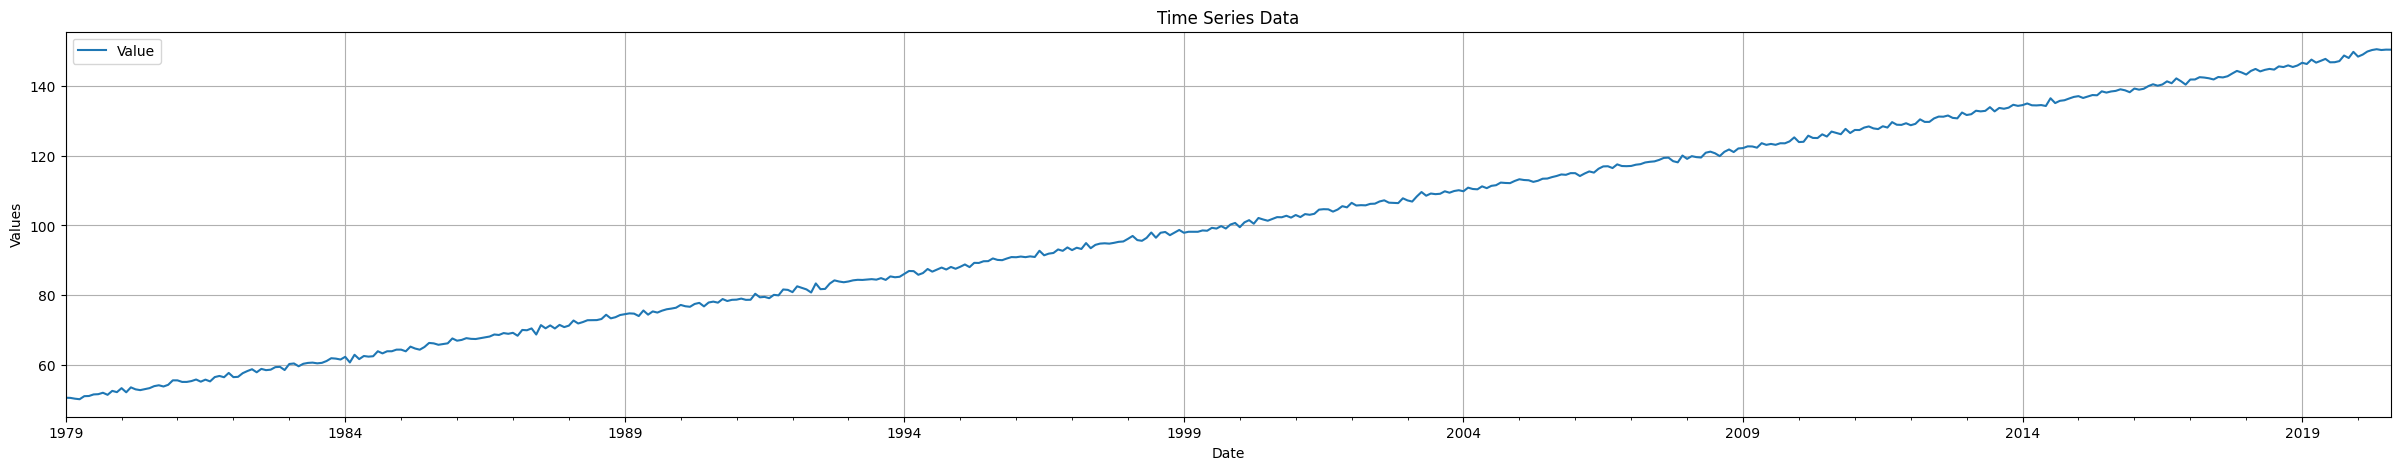

,Value
Date,
1979-01-31,50.699678
1979-02-28,50.662718
1979-03-31,50.430617
1979-04-30,50.277734
1979-05-31,51.150715
...,...
2020-04-30,150.201443
2020-05-31,150.429549
2020-06-30,150.203382


In [ ]:
# Load dataset

ts = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/ts_des_data-01.csv',
                      index_col = 'Date', parse_dates = True)

ts.plot(figsize = (30,5), grid = True, ylabel = 'Values', title = 'Time Series Data')
plt.show()
ts

### Check for trend and seasonality

In [ ]:
# STL Decomposition

from statsmodels.tsa.seasonal import STL

ts_stl = STL(ts["Value"], robust = True)  # Robust = better handling of outliers
decomp_stl = ts_stl.fit()

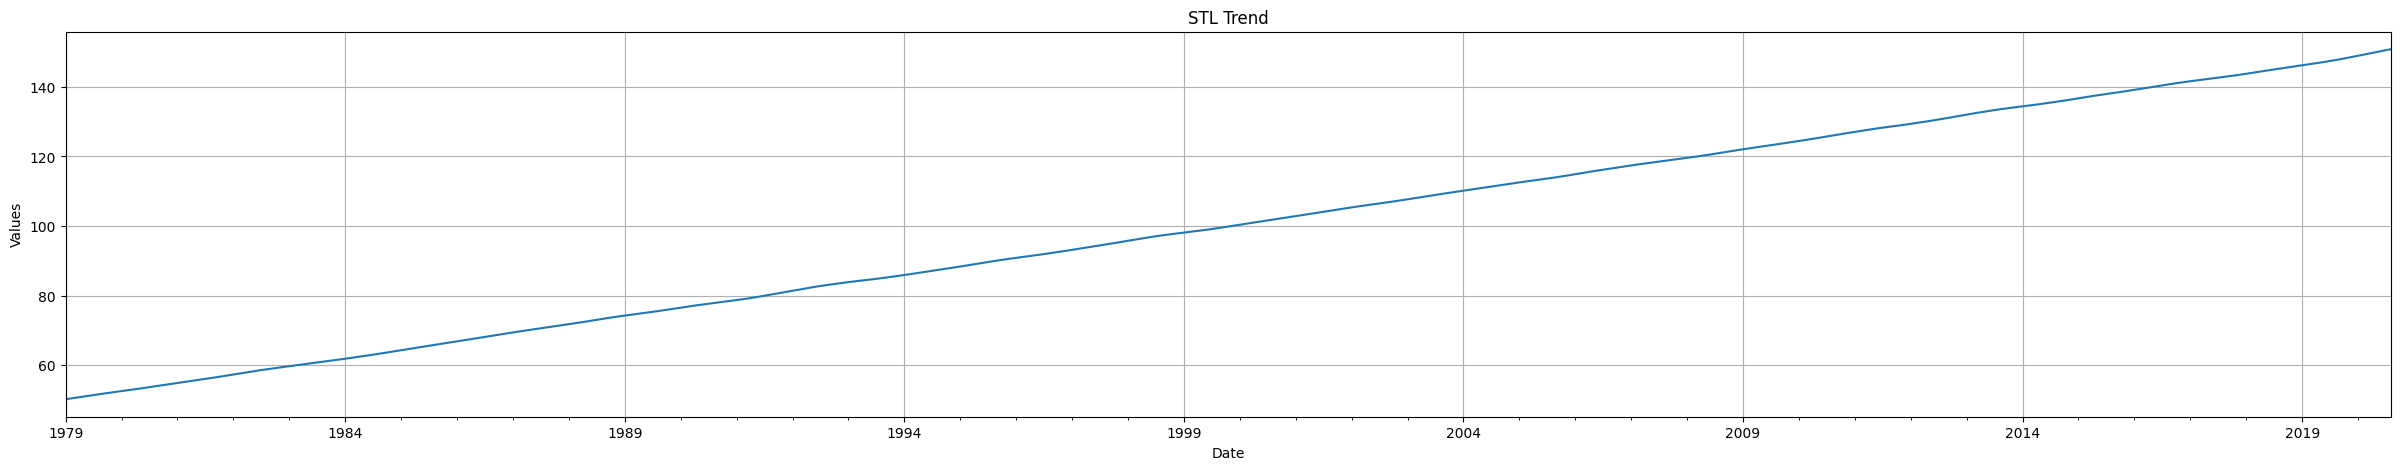

In [ ]:
# STL Trend

decomp_stl.trend.plot(figsize = (30,5), grid = True, ylabel = 'Values', title = 'STL Trend')
plt.show()

# It has a clear trend (upward)

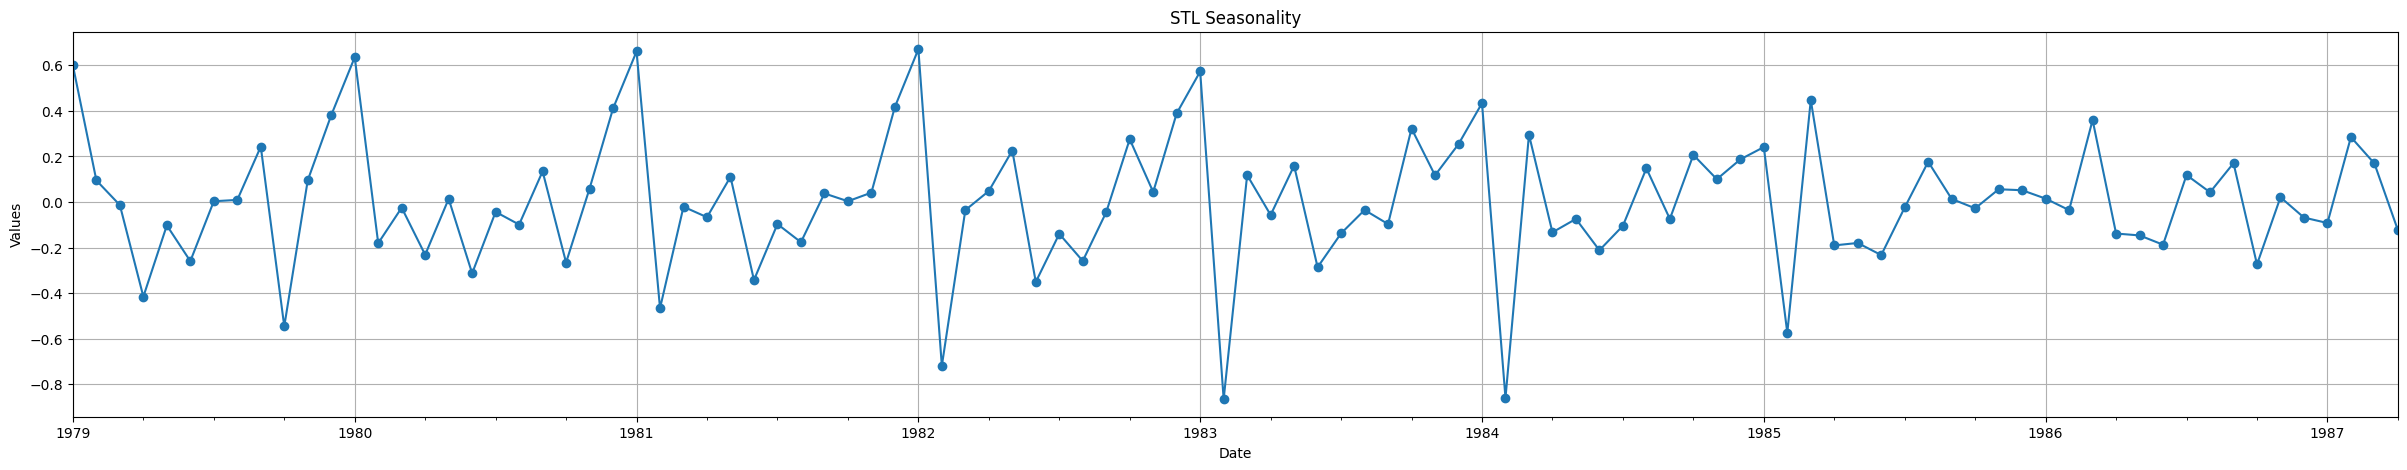

In [ ]:
# STL Seasonality

decomp_stl.seasonal[:100].plot(figsize = (30,5), grid = True, ylabel = 'Values', title = 'STL Seasonality', marker = 'o')
plt.show()

# No Clear Seasonality

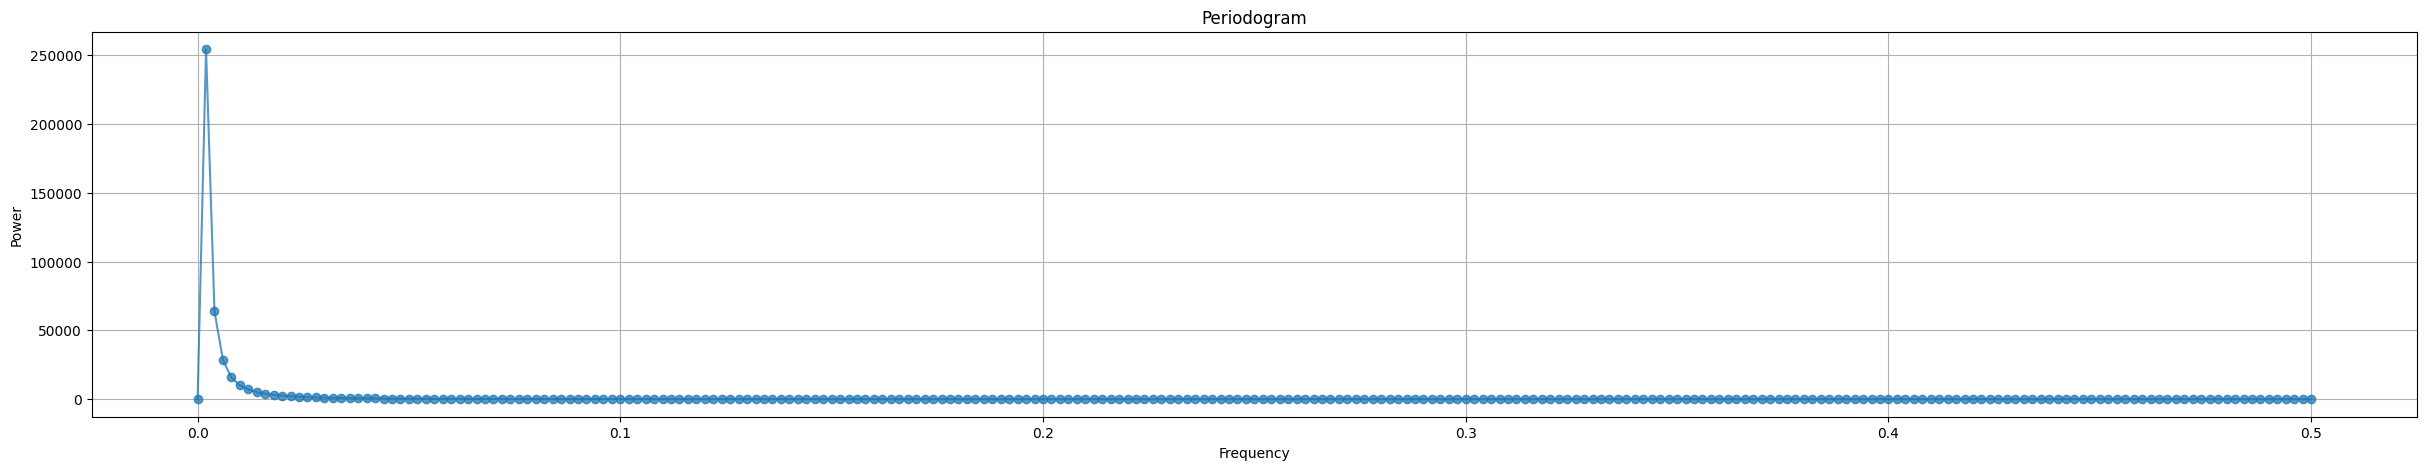

In [ ]:
# Periodogram (for Seasonality)

from scipy.signal import periodogram

# Compute the periodogram
frequencies, power = periodogram(ts['Value'])

# Plot the periodogram
plt.figure(figsize=(30, 5))
plt.plot(frequencies, power, marker='o', linestyle='-', alpha = 0.75)
plt.title("Periodogram")
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.grid(True)
plt.show()

# It exhibits seasonality at the start but does not sustain it on the later part of the series

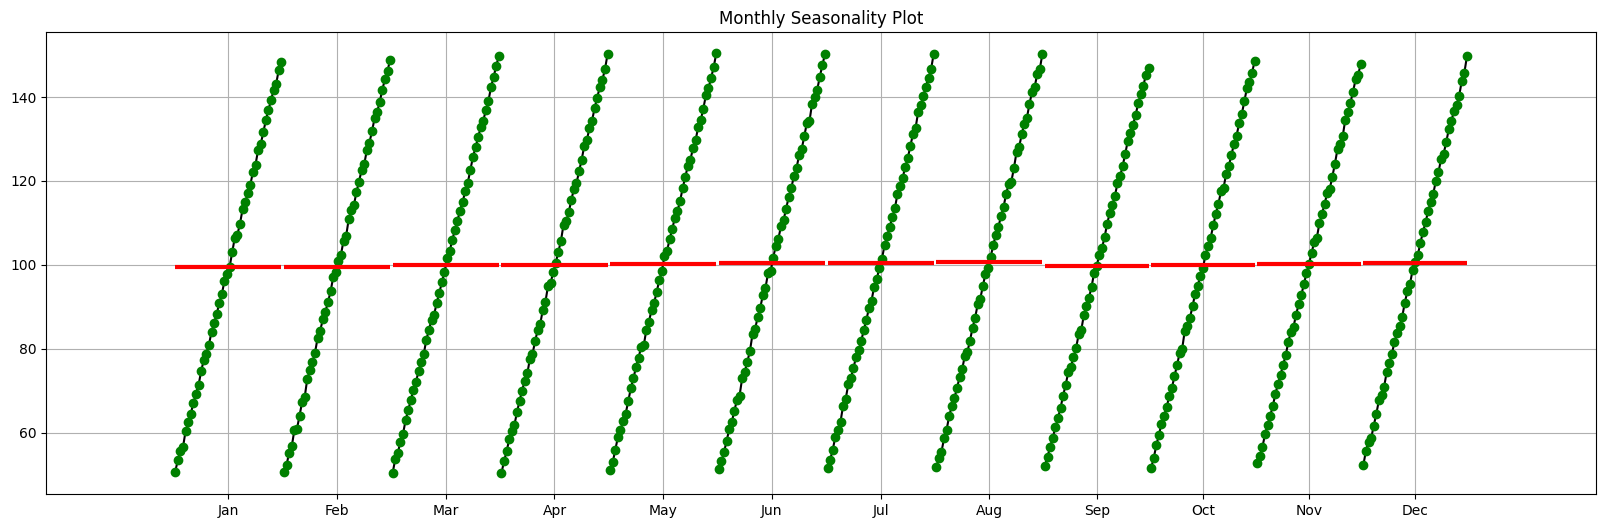

In [ ]:
# Month Plots

from statsmodels.graphics.tsaplots import month_plot

ts_monthly = ts['Value'].resample('MS').mean()

fig, ax = plt.subplots(figsize=(20, 6))
month_plot(ts_monthly, ax = ax)
plt.title("Monthly Seasonality Plot")
plt.grid()

for line in ax.get_lines():

  line.set_marker('o')
  line.set_markerfacecolor('green')
  line.set_markeredgecolor('green')

plt.show()

# The black lines represent monthly disribution of values
# The red lines is the mean values for each month

# The red line does not show a perfectly smooth repeating pattern, no considerable fluctuations.
# However, these fluctuations are not very strong, meaning that the seasonality is not very pronounced.

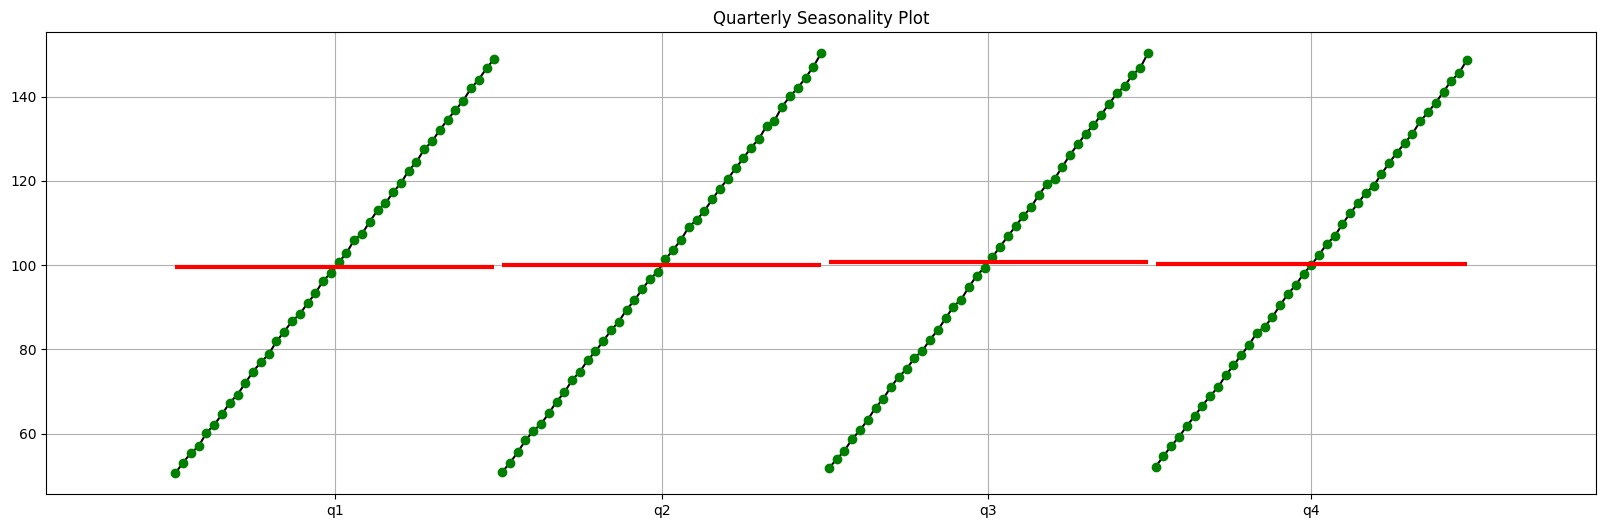

In [ ]:
# Quarter Plots

from statsmodels.graphics.tsaplots import quarter_plot

ts_quarter = ts['Value'].resample('QE').mean()

fig, ax = plt.subplots(figsize=(20, 6))
quarter_plot(ts_quarter, ax = ax)
plt.title("Quarterly Seasonality Plot")
plt.grid()

for line in ax.get_lines():

  line.set_marker('o')
  line.set_markerfacecolor('green')
  line.set_markeredgecolor('green')

plt.show()

# The black lines represent quarterly disribution of values
# The red lines is the mean values for each quarter

# We would expect consistent patterns where certain quarters always have higher or lower values. But the graphs shows it doe not have

### Forecasting Using DES

#### 1. Select a Model

In [ ]:
# We will use Double Exponential Smoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing

#### 2. Split data into train & test sets

In [ ]:
# Splitting

forecast_horizon = 12 # or periods

train_data = ts.iloc[:-forecast_horizon] # data except the last 12 months
test_data = ts.iloc[-forecast_horizon:] # select the last 12 months

train_data = train_data.asfreq('ME')
test_data = test_data.asfreq('ME')

#### 3. Fit model on training set

In [ ]:
des_model = ExponentialSmoothing(train_data['Value'], trend = 'additive').fit()

# des_model_.summary()

#### 4. Evaluate model on test set (visually first)

In [ ]:
# Forecast/Predict based on train_data

des_pred = des_model.forecast(forecast_horizon)
des_pred

,0
2019-09-30,147.815586
2019-10-31,148.015882
2019-11-30,148.216179
2019-12-31,148.416475
2020-01-31,148.616771
2020-02-29,148.817068
2020-03-31,149.017364
2020-04-30,149.217660
2020-05-31,149.417957
2020-06-30,149.618253


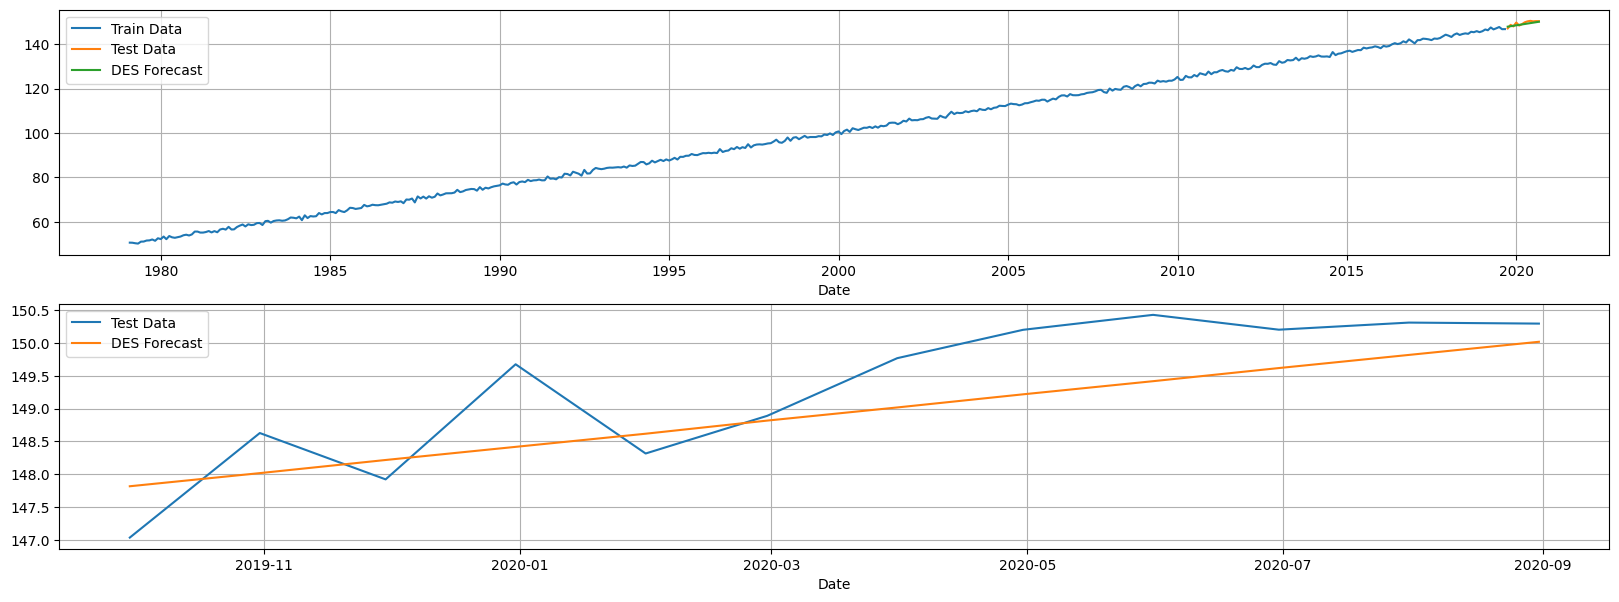

In [ ]:
# Visualization

plt.figure(figsize = (20, 7))

plt.subplot(2, 1, 1)
plt.plot(train_data.index, train_data['Value'], label = 'Train Data')
plt.plot(test_data.index, test_data['Value'], label = 'Test Data')
plt.plot(des_pred.index, des_pred, label = 'DES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Date')

plt.subplot(2, 1, 2)
plt.plot(test_data.index, test_data['Value'], label = 'Test Data')
plt.plot(des_pred.index, des_pred, label = 'DES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Date')
plt.show()

#### 5. Re-fit model on entire data set

In [ ]:
# Notice we are using the entire dataset

ts = ts.asfreq('ME')

des_model = ExponentialSmoothing(ts['Value'], trend = 'additive').fit()

6. Forecast for future data

In [ ]:
# We forecast using the entire dataset

des_pred = des_model.forecast(forecast_horizon)
des_pred

,0
2020-09-30,150.256053
2020-10-31,150.456459
2020-11-30,150.656866
2020-12-31,150.857272
2021-01-31,151.057679
2021-02-28,151.258085
2021-03-31,151.458492
2021-04-30,151.658898
2021-05-31,151.859304
2021-06-30,152.059711


Text(0.5, 0, 'Date')

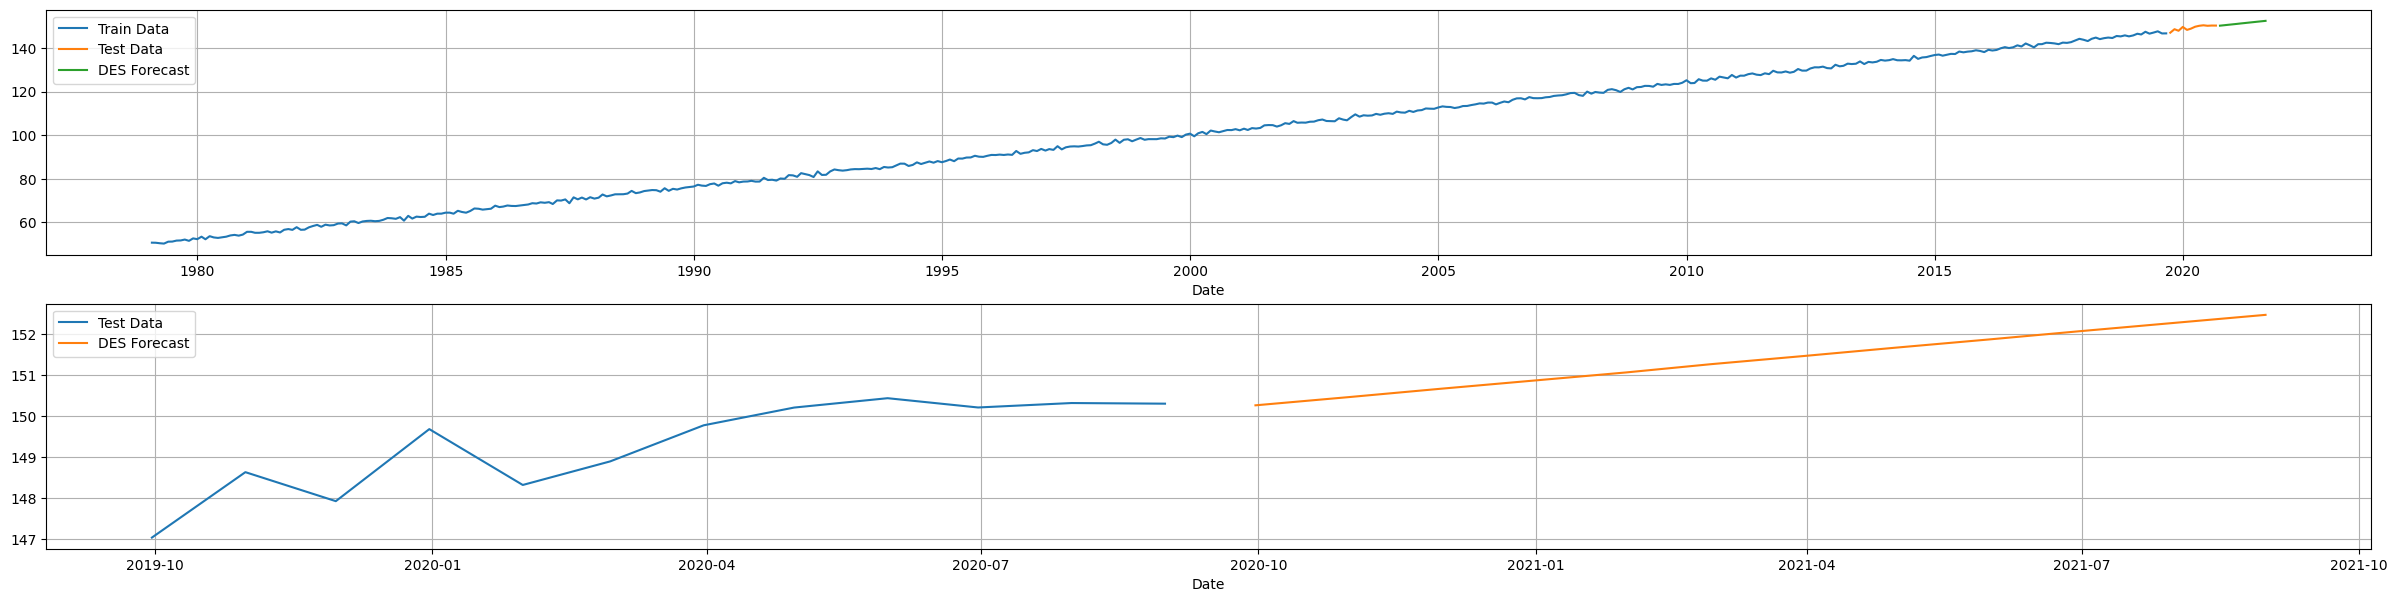

In [ ]:
# Visualization

plt.figure(figsize = (30, 7))

plt.subplot(2, 1, 1)
plt.plot(train_data.index, train_data['Value'], label = 'Train Data')
plt.plot(test_data.index, test_data['Value'], label = 'Test Data')
plt.plot(des_pred.index, des_pred, label = 'DES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Date')

plt.subplot(2, 1, 2)
plt.plot(test_data.index, test_data['Value'], label = 'Test Data')
plt.plot(des_pred.index, des_pred, label = 'DES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Date')